# Comparisons and analysis

This notebook is for getting the simulated data done on the cluster and then doing funky comparisons and analysis

In [35]:
# First Import the packages.
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from scipy import stats
#matplotlib.style.use('ggplot')
import inspect
import os
import csv 
import time

import glob
# import pandas as pd

In [7]:
# Now Import our data from our data folder:

# Get all csv filenames in a folder
all_files = glob.glob("do-not-track/*.csv")
#all_files

# Scorr of Empirical (Experimental) FCM vs SCM of Connectome

This gives a baseline of what the minimum correlation should be like. 

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


Text(0.05, 0.95, 'SpearmanrResult(correlation=0.43540936166150757, pvalue=6.919705554864947e-34)')

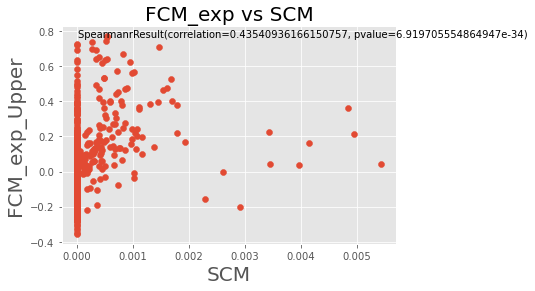

In [38]:
# Import Experimental Mouse Data FCM
FCM_exp = np.genfromtxt('do-not-track\\FCM_MouseExperimental.csv',delimiter = "\t")
# Simualted FCM
#FCM_sim = np.genfromtxt(all_files[4],delimiter="\t")
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "MouseCortex"

con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

SCM = con.weights

# Comparing FC_experimental Vs FC_Simulation with Spearman Correlation

# Grab Upper triangles
FCM_exp_Upper = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
SCM_Upper = SCM[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_exp_Upper,b=FCM_sim_Upper)
#print(SCorr)

# Scatterplot
plt.scatter(SCM_Upper,FCM_exp_Upper)
plt.xlabel('SCM', fontsize=20)
plt.ylabel('FCM_exp_Upper', fontsize=20)
plt.title('FCM_exp vs SCM', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')

# Comparison of SCorr vs Selected Variable (G = Coupling constant)

 

In [4]:
# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("do-not-track/*SCorr*.csv")

SCorr_array = []

# Loop to populate the empty array with the numbers from the Scorr csv files:

for item in Scorr_files:
    a = np.genfromtxt(item)
    SCorr_array.append(a[0])

print(SCorr_array)

[-0.053453065057792015, -0.053283921720290624, -0.05330062605666915, -0.05330062605666915, -0.05330062605666915, -0.05328382626693989, -0.05328382626693989, -0.05328382626693989, -0.05328382626693989, -0.05328382626693989, -0.053265069683520586, -0.053265069683520586, -0.05341984729173644, -0.0532429245061502, -0.053223595202626484, -0.053223595202626484, -0.05320841811985971, -0.05320841811985971, -0.05319524555745836, -0.05319524555745836, -0.05319524555745836, -0.05319524555745836, -0.05317782532094933, -0.05340085207494028, -0.05317782532094933, -0.05317782532094933, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.05312465780459026, -0.05312465780459026, -0.05312465780459026, -0.05340085207494028, -0.05340085207494028, -0.05334229144426472, -0.05334229144426472, -0.05332243714731197, -0.05332243714731197, -0.05330234421698237]


Text(0.5, 1.0, 'Scorr vs G')

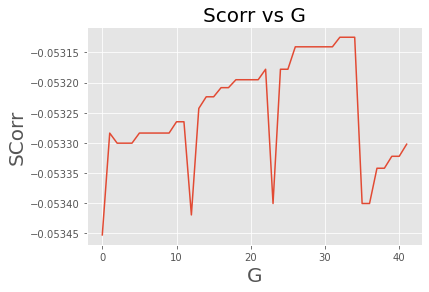

In [5]:
# Graph it: 

plt.plot(SCorr_array)
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr', fontsize=20)
plt.title('Scorr vs G', fontsize=20)

In [10]:
# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(all_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

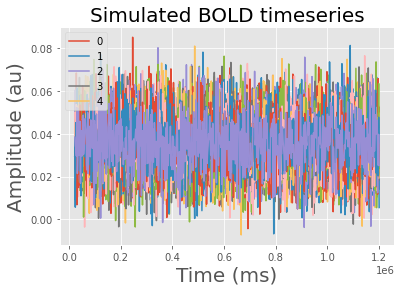

In [36]:
# plt.subplots()

#plt.figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')
for tseries in bold_data:
    plt.plot(bold_time,tseries)

plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated BOLD timeseries', fontsize=20)
plt.legend(('0','1','2','3','4'))